In [36]:
import cv2
import pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image

from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_input
from tensorflow.keras.applications.xception import preprocess_input as xception_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing import image as image_method

In [3]:
with open("le_classes.pkl", "rb") as f:
    classes_fine = pickle.load(f)

In [5]:
classes_coarse = []

coarse_dict = {
    'automotive': ['Automobile,Comedy', 'Automobile'],
    'blog': ['Blog,Comedy', 'Blog,Entertainment', 'Blog', 'Blog,Science'],
    'comedy': ['Comedy', 'Comedy,Informative', 'Comedy,Entertainment'],
    'entertainment': ['Entertainment,Blog', 'Entertainment,Comedy', 'Entertainment'],
    'food': ['Food', 'Food,Entertainment'],
    'information': ['Science', 'News', 'Informative'],
    'technology': ['VideoGames', 'Tech,Comedy', 'Tech,News', 'Tech,Informative', 'Tech'],
}

for class_fine in classes_fine:
    for key, value in coarse_dict.items():
        if class_fine in value:
            classes_coarse.append(key)

# Load Models

In [6]:
custom_v2 = load_model("./saved_models/v2/custom.h5")
inception_v2 = load_model("./saved_models/v2/inception_v3.h5")
resnet_v2 = load_model("./saved_models/v2/resnet_50.h5")
vgg_16_v2 = load_model("./saved_models/v2/vgg_16.h5")
xception_v2 = load_model("./saved_models/v2/xception.h5")

# Original Image

In [7]:
image_dirs = [
    "./data/images/NowThis News/t-lMIGV-dUI.jpg",
    "./data/images/The Grand Tour/IDtHjIe13aU.jpg",
    "./data/images/Fireship/ZtyMdRzvi0w.jpg",
    "./data/images/The Office/8GxqvnQyaxs.jpg",
    "./data/images/JRE Clips/VFns39RXPrU.jpg"
]

In [5]:
for layer in vgg_16_v2.layers:
    print(layer)

In [8]:
dataset = []

for image_dir in image_dirs:
    image = Image.open(image_dir)
    rgb_image = image.copy().convert("RGB")
    dataset.append(np.array(rgb_image.resize((224, 224)), dtype=np.uint8))

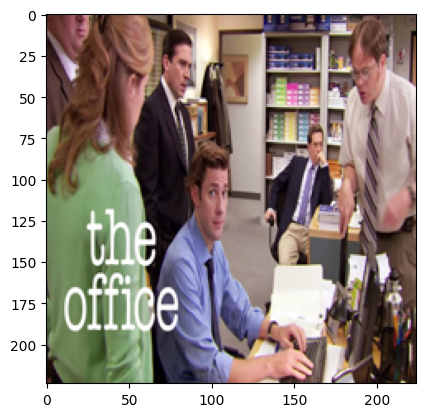

In [11]:
plt.imshow(dataset[3])

# SHAP Values

Partition explainer: 2it [00:45, 45.29s/it]               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


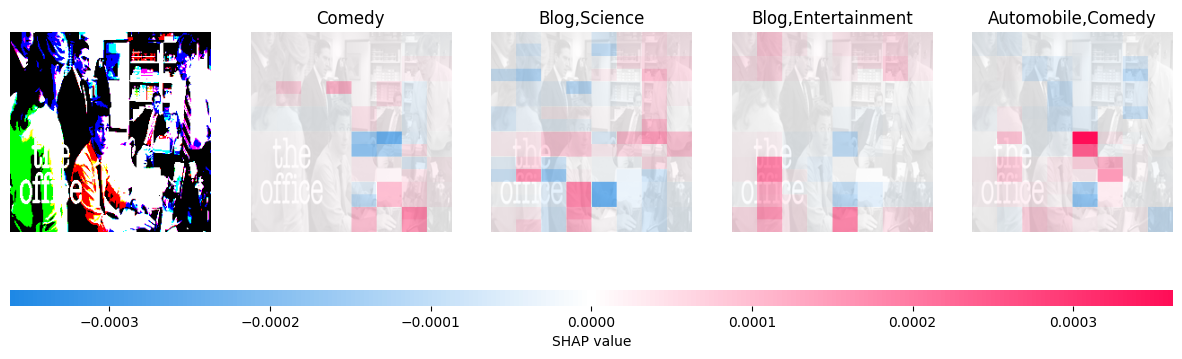

In [21]:
import shap
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

x = image.img_to_array(dataset[3])
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

masker = shap.maskers.Image("inpaint_telea", x.shape[1:])
explainer = shap.Explainer(xception_v2, masker, output_names=classes_fine, algorithm="partition")
shap_values = explainer(x, max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])
shap.image_plot(shap_values)

# Lime

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 400ms/step


  2%|▏         | 15/1000 [00:00<00:38, 25.68it/s]

1/1 [==============================] - 0s 384ms/step


  2%|▎         | 25/1000 [00:01<00:47, 20.45it/s]

1/1 [==============================] - 0s 359ms/step


  4%|▎         | 35/1000 [00:01<00:48, 19.75it/s]

1/1 [==============================] - 0s 348ms/step


  4%|▍         | 45/1000 [00:02<00:48, 19.55it/s]

1/1 [==============================] - 0s 370ms/step


  6%|▌         | 55/1000 [00:03<00:49, 19.13it/s]

1/1 [==============================] - 0s 371ms/step


  6%|▋         | 65/1000 [00:03<00:49, 18.89it/s]

1/1 [==============================] - 0s 380ms/step


  8%|▊         | 75/1000 [00:04<00:49, 18.70it/s]

1/1 [==============================] - 0s 363ms/step


  8%|▊         | 85/1000 [00:04<00:49, 18.61it/s]

1/1 [==============================] - 0s 364ms/step


 10%|▉         | 95/1000 [00:05<00:48, 18.78it/s]

1/1 [==============================] - 0s 372ms/step


 10%|█         | 105/1000 [00:06<00:47, 18.69it/s]

1/1 [==============================] - 0s 356ms/step


 12%|█▏        | 115/1000 [00:06<00:47, 18.81it/s]

1/1 [==============================] - 0s 396ms/step


 12%|█▎        | 125/1000 [00:07<00:47, 18.39it/s]

1/1 [==============================] - 0s 394ms/step


 14%|█▎        | 135/1000 [00:07<00:47, 18.14it/s]

1/1 [==============================] - 0s 364ms/step


 14%|█▍        | 145/1000 [00:08<00:46, 18.42it/s]

1/1 [==============================] - 0s 416ms/step


 16%|█▌        | 155/1000 [00:09<00:47, 17.80it/s]

1/1 [==============================] - 0s 448ms/step


 16%|█▋        | 165/1000 [00:09<00:48, 17.17it/s]

1/1 [==============================] - 0s 362ms/step


 18%|█▊        | 175/1000 [00:10<00:45, 18.06it/s]

1/1 [==============================] - 0s 415ms/step


 18%|█▊        | 185/1000 [00:11<00:45, 17.72it/s]

1/1 [==============================] - 0s 399ms/step


 20%|█▉        | 195/1000 [00:11<00:45, 17.85it/s]

1/1 [==============================] - 0s 416ms/step


 20%|██        | 205/1000 [00:12<00:45, 17.53it/s]

1/1 [==============================] - 0s 407ms/step


 22%|██▏       | 215/1000 [00:13<00:44, 17.54it/s]

1/1 [==============================] - 0s 401ms/step


 22%|██▎       | 225/1000 [00:13<00:44, 17.55it/s]

1/1 [==============================] - 0s 457ms/step


 24%|██▎       | 235/1000 [00:14<00:45, 16.92it/s]

1/1 [==============================] - 0s 432ms/step


 24%|██▍       | 245/1000 [00:15<00:44, 16.92it/s]

1/1 [==============================] - 0s 382ms/step


 26%|██▌       | 255/1000 [00:15<00:42, 17.65it/s]

1/1 [==============================] - 0s 359ms/step


 26%|██▋       | 265/1000 [00:16<00:40, 18.26it/s]

1/1 [==============================] - 0s 362ms/step


 28%|██▊       | 275/1000 [00:16<00:39, 18.56it/s]

1/1 [==============================] - 0s 348ms/step


 28%|██▊       | 285/1000 [00:17<00:37, 18.94it/s]

1/1 [==============================] - 0s 372ms/step


 30%|██▉       | 295/1000 [00:18<00:37, 18.74it/s]

1/1 [==============================] - 0s 360ms/step


 30%|███       | 305/1000 [00:18<00:36, 18.79it/s]

1/1 [==============================] - 0s 378ms/step


 32%|███▏      | 315/1000 [00:19<00:36, 18.70it/s]

1/1 [==============================] - 0s 370ms/step


 32%|███▎      | 325/1000 [00:19<00:36, 18.65it/s]

1/1 [==============================] - 0s 354ms/step


 34%|███▎      | 335/1000 [00:20<00:35, 18.99it/s]

1/1 [==============================] - 0s 373ms/step


 34%|███▍      | 345/1000 [00:21<00:34, 18.85it/s]

1/1 [==============================] - 0s 385ms/step


 36%|███▌      | 355/1000 [00:21<00:34, 18.52it/s]

1/1 [==============================] - 0s 367ms/step


 36%|███▋      | 365/1000 [00:22<00:34, 18.62it/s]

1/1 [==============================] - 0s 387ms/step


 38%|███▊      | 375/1000 [00:22<00:33, 18.42it/s]

1/1 [==============================] - 0s 395ms/step


 38%|███▊      | 385/1000 [00:23<00:33, 18.13it/s]

1/1 [==============================] - 0s 379ms/step


 40%|███▉      | 395/1000 [00:24<00:32, 18.36it/s]

1/1 [==============================] - 0s 397ms/step


 40%|████      | 405/1000 [00:24<00:32, 18.22it/s]

1/1 [==============================] - 0s 363ms/step


 42%|████▏     | 415/1000 [00:25<00:31, 18.40it/s]

1/1 [==============================] - 0s 374ms/step


 42%|████▎     | 425/1000 [00:25<00:31, 18.44it/s]

1/1 [==============================] - 0s 354ms/step


 44%|████▎     | 435/1000 [00:26<00:29, 18.89it/s]

1/1 [==============================] - 0s 391ms/step


 44%|████▍     | 445/1000 [00:27<00:30, 18.39it/s]

1/1 [==============================] - 0s 383ms/step


 46%|████▌     | 455/1000 [00:27<00:29, 18.41it/s]

1/1 [==============================] - 0s 391ms/step


 46%|████▋     | 465/1000 [00:28<00:29, 18.17it/s]

1/1 [==============================] - 0s 428ms/step


 48%|████▊     | 475/1000 [00:29<00:29, 17.61it/s]

1/1 [==============================] - 0s 450ms/step


 48%|████▊     | 485/1000 [00:29<00:30, 17.03it/s]

1/1 [==============================] - 0s 445ms/step


 50%|████▉     | 495/1000 [00:30<00:30, 16.77it/s]

1/1 [==============================] - 0s 435ms/step


 50%|█████     | 505/1000 [00:31<00:29, 16.75it/s]

1/1 [==============================] - 0s 354ms/step


 52%|█████▏    | 515/1000 [00:31<00:27, 17.86it/s]

1/1 [==============================] - 0s 356ms/step


 52%|█████▎    | 525/1000 [00:32<00:25, 18.50it/s]

1/1 [==============================] - 0s 374ms/step


 54%|█████▎    | 535/1000 [00:32<00:25, 18.48it/s]

1/1 [==============================] - 0s 365ms/step


 55%|█████▍    | 545/1000 [00:33<00:24, 18.68it/s]

1/1 [==============================] - 0s 358ms/step


 56%|█████▌    | 555/1000 [00:34<00:23, 18.79it/s]

1/1 [==============================] - 0s 352ms/step


 56%|█████▋    | 565/1000 [00:34<00:22, 18.99it/s]

1/1 [==============================] - 0s 361ms/step


 57%|█████▊    | 575/1000 [00:35<00:22, 19.01it/s]

1/1 [==============================] - 0s 364ms/step


 58%|█████▊    | 585/1000 [00:35<00:21, 18.95it/s]

1/1 [==============================] - 0s 356ms/step


 60%|█████▉    | 595/1000 [00:36<00:21, 19.06it/s]

1/1 [==============================] - 0s 370ms/step


 60%|██████    | 605/1000 [00:37<00:20, 18.87it/s]

1/1 [==============================] - 0s 360ms/step


 62%|██████▏   | 615/1000 [00:37<00:20, 18.91it/s]

1/1 [==============================] - 0s 354ms/step


 62%|██████▎   | 625/1000 [00:38<00:19, 18.99it/s]

1/1 [==============================] - 0s 360ms/step


 64%|██████▎   | 635/1000 [00:38<00:19, 18.98it/s]

1/1 [==============================] - 0s 355ms/step


 64%|██████▍   | 645/1000 [00:39<00:18, 19.14it/s]

1/1 [==============================] - 0s 365ms/step


 66%|██████▌   | 655/1000 [00:40<00:18, 19.07it/s]

1/1 [==============================] - 0s 350ms/step


 66%|██████▋   | 665/1000 [00:40<00:17, 18.97it/s]

1/1 [==============================] - 0s 355ms/step


 68%|██████▊   | 675/1000 [00:41<00:17, 19.07it/s]

1/1 [==============================] - 0s 353ms/step


 68%|██████▊   | 685/1000 [00:41<00:16, 19.10it/s]

1/1 [==============================] - 0s 344ms/step


 70%|██████▉   | 695/1000 [00:42<00:15, 19.31it/s]

1/1 [==============================] - 0s 395ms/step


 70%|███████   | 705/1000 [00:43<00:15, 18.46it/s]

1/1 [==============================] - 0s 390ms/step


 72%|███████▏  | 715/1000 [00:43<00:15, 18.29it/s]

1/1 [==============================] - 0s 396ms/step


 72%|███████▎  | 725/1000 [00:44<00:15, 18.17it/s]

1/1 [==============================] - 0s 383ms/step


 74%|███████▎  | 735/1000 [00:44<00:14, 18.18it/s]

1/1 [==============================] - 0s 383ms/step


 74%|███████▍  | 745/1000 [00:45<00:14, 18.15it/s]

1/1 [==============================] - 0s 377ms/step


 76%|███████▌  | 755/1000 [00:46<00:13, 18.19it/s]

1/1 [==============================] - 0s 366ms/step


 76%|███████▋  | 765/1000 [00:46<00:12, 18.58it/s]

1/1 [==============================] - 0s 433ms/step


 78%|███████▊  | 775/1000 [00:47<00:12, 17.56it/s]

1/1 [==============================] - 0s 438ms/step


 78%|███████▊  | 785/1000 [00:48<00:12, 17.13it/s]

1/1 [==============================] - 0s 420ms/step


 80%|███████▉  | 795/1000 [00:48<00:11, 17.21it/s]

1/1 [==============================] - 0s 389ms/step


 80%|████████  | 805/1000 [00:49<00:11, 17.61it/s]

1/1 [==============================] - 0s 436ms/step


 82%|████████▏ | 815/1000 [00:50<00:10, 17.32it/s]

1/1 [==============================] - 0s 389ms/step


 82%|████████▎ | 825/1000 [00:50<00:09, 17.69it/s]

1/1 [==============================] - 0s 433ms/step


 84%|████████▎ | 835/1000 [00:51<00:09, 17.30it/s]

1/1 [==============================] - 0s 385ms/step


 84%|████████▍ | 845/1000 [00:51<00:08, 17.83it/s]

1/1 [==============================] - 0s 367ms/step


 86%|████████▌ | 855/1000 [00:52<00:07, 18.32it/s]

1/1 [==============================] - 0s 361ms/step


 86%|████████▋ | 865/1000 [00:53<00:07, 18.57it/s]

1/1 [==============================] - 0s 351ms/step


 88%|████████▊ | 875/1000 [00:53<00:06, 18.86it/s]

1/1 [==============================] - 0s 348ms/step


 88%|████████▊ | 885/1000 [00:54<00:06, 19.05it/s]

1/1 [==============================] - 0s 366ms/step


 90%|████████▉ | 895/1000 [00:54<00:05, 18.89it/s]

1/1 [==============================] - 0s 356ms/step


 90%|█████████ | 905/1000 [00:55<00:04, 19.08it/s]

1/1 [==============================] - 0s 365ms/step


 92%|█████████▏| 915/1000 [00:56<00:04, 18.89it/s]

1/1 [==============================] - 0s 366ms/step


 92%|█████████▎| 925/1000 [00:56<00:03, 18.82it/s]

1/1 [==============================] - 0s 358ms/step


 94%|█████████▎| 935/1000 [00:57<00:03, 18.76it/s]

1/1 [==============================] - 0s 354ms/step


 94%|█████████▍| 945/1000 [00:57<00:02, 18.92it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████▌| 955/1000 [00:58<00:02, 18.95it/s]

1/1 [==============================] - 0s 391ms/step


 96%|█████████▋| 965/1000 [00:59<00:01, 18.51it/s]

1/1 [==============================] - 0s 386ms/step


 98%|█████████▊| 975/1000 [00:59<00:01, 18.36it/s]

1/1 [==============================] - 0s 376ms/step


 98%|█████████▊| 985/1000 [01:00<00:00, 18.38it/s]

1/1 [==============================] - 0s 399ms/step


100%|█████████▉| 995/1000 [01:01<00:00, 18.05it/s]

1/1 [==============================] - 0s 398ms/step


100%|██████████| 1000/1000 [01:01<00:00, 16.25it/s]


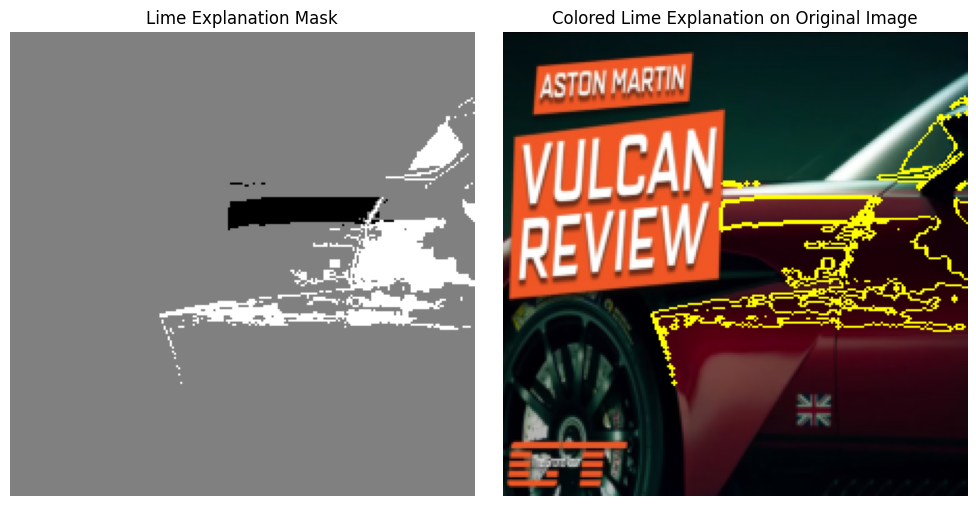

In [99]:
import skimage
from lime import lime_image
from tensorflow.keras.preprocessing import image

value = 1

original_image = plt.imread(image_dirs[value])
resized_image = skimage.transform.resize(original_image, (224, 224), anti_aliasing=True)

img_arr = image.img_to_array(dataset[value])
img_arr = np.expand_dims(img_arr, axis=0)
img_processed = preprocess_input(img_arr)

lime_explainer = lime_image.LimeImageExplainer()
lime_explanation = lime_explainer.explain_instance(img_arr[0], vgg_16_v2.predict)

# Get the explanation image
temp, mask = lime_explanation.get_image_and_mask(lime_explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

# Create a colored version of the mask overlaid on the original image
colored_mask = skimage.segmentation.mark_boundaries(resized_image, mask)

# Display the original image with the Lime explanation mask
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(mask, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Lime Explanation Mask')

# Display the colored version of the mask overlaid on the original image
ax[1].imshow(colored_mask)
ax[1].axis('off')
ax[1].set_title('Colored Lime Explanation on Original Image')

plt.tight_layout()
plt.show()